### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import losses, optimizers, models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Loading the Dataset

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
print('First element of X_train is: ', X_train[0])

First element of X_train is:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 

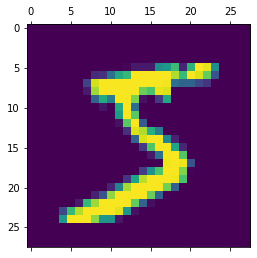

In [7]:
plt.matshow(X_train[0])

In [8]:
Y_train[0]

5

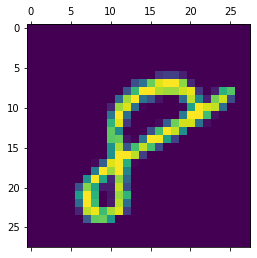

In [9]:
plt.matshow(X_train[-1])

In [10]:
Y_train[-1]

8

We can see that X_train has the handwritten digit 5 as the first element and 8 as the last element and Y_train also has the same corresponding labels.

### Flattening out the 28*28 pixel values of images in the numpy array to 1D matrix of 784 values

In [11]:
X_train_flat = X_train.reshape(len(X_train),28*28)

In [12]:
X_train_flat.shape

(60000, 784)

In [13]:
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

#### Alternate way to flatten the 28*28 matrix to 1D matrix with 784 values

In [14]:
X_train_flattened = X_train.reshape(*X_train.shape[:1], -1)
X_test_flattened = X_test.reshape(*X_test.shape[:1], -1)

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizing the dataset

In [17]:
x_train = X_train_flattened / 255.0
x_test = X_test_flattened / 255.0

### Defining the model

In [18]:
model = keras.Sequential(
    [
        keras.Input(shape=(28*28)),
        layers.Dense(512, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(10, activation="linear", name="layer3"),
    ]
)

In [19]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

## Fitting the model

In [20]:
model.fit(x_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1861 - accuracy: 0.9435
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0788 - accuracy: 0.9756
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0536 - accuracy: 0.9825
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0422 - accuracy: 0.9868
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0309 - accuracy: 0.9903
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

### Evaluating the model

In [21]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1443 - accuracy: 0.9808


[0.14429375529289246, 0.9807999730110168]

In [22]:
model.metrics_names  # The two values above are the loss and accuracy of the model of the test set.

['loss', 'accuracy']

### Predicting values

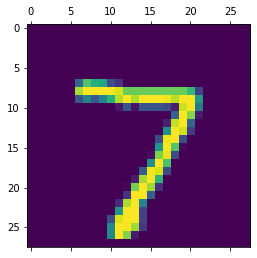

In [23]:
plt.matshow(X_test[0])

In [24]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [25]:
y_hat = np.array([np.argmax(i) for i in y_predicted])
y_hat[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [26]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Saving the model

In [27]:
# model.save("saved_model")

In [28]:
model.save("savedmodel/saved_model.h5")

### Gradio interface

In [29]:
import gradio as gr

In [30]:
def classify(image):
    im_reshape = image.reshape(1,784)
    im_resize = im_reshape/255.0
    prediction = model.predict(im_resize)
    pred = np.argmax(prediction)
    return pred

In [31]:
draw = gr.Interface(fn=classify, 
             inputs="sketchpad",
             outputs="label")
draw.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://19003.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x220eee596a0>,
 'http://127.0.0.1:7861/',
 'https://19003.gradio.app')

1/1 [==============================] - 0s 84ms/step
